In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [3]:
######### Try Data augmentation

train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)



In [4]:
###################################################################### The Model
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [5]:
# Train

history = model.fit_generator(
        train_generator,
        steps_per_epoch = 1500,
        epochs = 10,
        validation_data = (X_test, y_test)
)


<ipython-input-5-7e854f7ea904>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1500/1500 [==============================] - 202s 134ms/step - loss: 1.7223 - accuracy: 0.3786 - val_loss: 1.5228 - val_accuracy: 0.4537
Epoch 2/10
1500/1500 [==============================] - 195s 130ms/step - loss: 1.4387 - accuracy: 0.4828 - val_loss: 1.6007 - val_accuracy: 0.4254
Epoch 3/10
1500/1500 [==============================] - 226s 151ms/step - loss: 1.3042 - accuracy: 0.5370 - val_loss: 1.4409 - val_accuracy: 0.5011
Epoch 4/10
1500/1500 [==============================] - 232s 154ms/step - loss: 1.2308 - accuracy: 0.5644 - val_loss: 1.6041 - val_accuracy: 0.4901
Epoch 5/10
1500/1500 [==============================] - 218s 145ms/step - loss: 1.1871 - accuracy: 0.5796 - val_loss: 1.4387 - val_accuracy: 0.5286
Epoch 6/10
1500/1500 [==============================] - 204s 136ms/step - loss: 1.1449 - accuracy: 0.5958 - val_loss: 1.6118 - val_accuracy: 0.4678
Epoch 7/10
1500/1500 [==============================] - 204s 136ms/step - loss: 1.1255 - accuracy: 0.6045 - val_

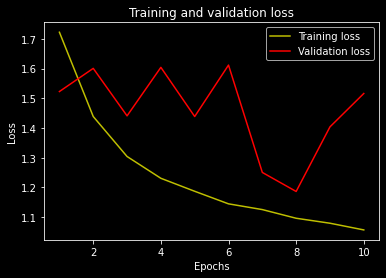

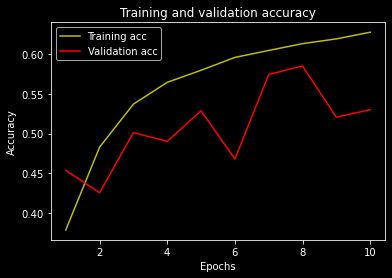

In [6]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
